In [61]:
import piplite
await piplite.install('seaborn')

import numpy as np
import pandas as pd
# some imports to set up plotting
import matplotlib.pyplot as plt
from datetime import datetime, date

import seaborn as sns

# Graphics in retina format are more sharp and legible
%config InlineBackend.figure_format = 'retina'


df = pd.read_csv('Customers_PP.csv',sep = '|')
#results.head()

#Display the info
print(df.info())

#get the issue rows
issue_rows=df['YearlyIncome'].isin(['F','M'])
#WRITE CSV FILE WITH DATA ISSUES
issue_rows.to_csv('issue_data.csv')

#fix the records by shifting a column
df.loc[2331] = df.loc[2331][:6].append(df.loc[2331][6:].shift())
df.loc[8762] = df.loc[8762][:6].append(df.loc[8762][6:].shift())
df.loc[16118] = df.loc[16118][:6].append(df.loc[16118][6:].shift())


# fix the NumberChildrenAtHome row and remove comma(,)
df.NumberChildrenAtHome = df.NumberChildrenAtHome.replace(',','', regex=True) 

#set datatypes
df['TotalPurchaseYTD'] = df['TotalPurchaseYTD'].astype("float64")
#results['DateFirstPurchase'] = pd.to_datetime(results['DateFirstPurchase'])#.astype("datetime") pd.to_datetime
#results['BirthDate'] = pd.to_datetime(results['BirthDate'])#.astype("datetime")
df['TotalChildren'] = df['TotalChildren'].astype("int64")
df['NumberChildrenAtHome'] = df['NumberChildrenAtHome'].astype("int64")
df['NumberCarsOwned'] = df['NumberCarsOwned'].astype("int64")
df['HomeOwnerFlag'] = df['HomeOwnerFlag'].astype("bool")


#New dataset with updated Gender 
df.loc[df['FirstName'].isin(['Rebekah', 'Kate','Jennifer','Julia','Elizabeth','Alisha','Sarah']), 'Gender']='F'
df.loc[df['FirstName'].isin(['Julian', 'Ian','Carlos','Lee','Randall','Ricky']), 'Gender']='M'

#set Title based on gender
df.loc[(df['Gender'] == 'M') & (df['Title']!=''),'Title'] = 'Mr.' 
df.loc[(df['Gender'] == 'F') & (df['Title']!=''),'Title'] = 'Ms.' 


# This function converts given date to age
def age(born):
    born = datetime.strptime(born, "%Y-%m-%d").date() #'1961-02-23'
    today = date.today()
    return today.year - born.year - ((today.month, 
                                      today.day) < (born.month, 
                                                    born.day))
#create new coloum Age based on date of birth  
df['Age'] = df['BirthDate'].apply(age)

#create new coloum Age based on date of birth  
df['YearsCustomer'] = df['DateFirstPurchase'].apply(age)

# set to 2f 
pd.options.display.float_format = '{:.2f}'.format

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18484 entries, 0 to 18483
Data columns (total 20 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   CustomerID            18484 non-null  int64 
 1   BusinessEntityID      18484 non-null  int64 
 2   Title                 101 non-null    object
 3   FirstName             18484 non-null  object
 4   MiddleName            10654 non-null  object
 5   LastName              18484 non-null  object
 6   Suffix                6 non-null      object
 7   TotalPurchaseYTD      18484 non-null  object
 8   DateFirstPurchase     18484 non-null  object
 9   BirthDate             18484 non-null  object
 10  MaritalStatus         18484 non-null  object
 11  YearlyIncome          18484 non-null  object
 12  Gender                18484 non-null  object
 13  TotalChildren         18484 non-null  int64 
 14  NumberChildrenAtHome  18484 non-null  object
 15  Education             18484 non-null

<ipython-input-61-6e8644a7bccc>:28: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df.loc[2331] = df.loc[2331][:6].append(df.loc[2331][6:].shift())
<ipython-input-61-6e8644a7bccc>:29: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df.loc[8762] = df.loc[8762][:6].append(df.loc[8762][6:].shift())
<ipython-input-61-6e8644a7bccc>:30: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df.loc[16118] = df.loc[16118][:6].append(df.loc[16118][6:].shift())


In [63]:
# calculate mean for all factors
fill_rates = 100 * (1 - df.isna().mean())
print(fill_rates)

CustomerID             100.00
BusinessEntityID       100.00
Title                  100.00
FirstName              100.00
MiddleName              57.64
LastName               100.00
Suffix                   0.02
TotalPurchaseYTD       100.00
DateFirstPurchase      100.00
BirthDate              100.00
MaritalStatus          100.00
YearlyIncome           100.00
Gender                 100.00
TotalChildren          100.00
NumberChildrenAtHome   100.00
Education              100.00
Ocupation              100.00
HomeOwnerFlag          100.00
NumberCarsOwned        100.00
CommuteDistance        100.00
Age                    100.00
YearsCustomer          100.00
dtype: float64


In [64]:
#distinct count
distinct_counts = df.nunique()
print(distinct_counts)

CustomerID              18484
BusinessEntityID        18484
Title                       2
FirstName                 670
MiddleName                 44
LastName                  375
Suffix                      1
TotalPurchaseYTD         3994
DateFirstPurchase        1124
BirthDate                8252
MaritalStatus               2
YearlyIncome                5
Gender                      2
TotalChildren               6
NumberChildrenAtHome        7
Education                   5
Ocupation                   5
HomeOwnerFlag               2
NumberCarsOwned             5
CommuteDistance             5
Age                        70
YearsCustomer               4
dtype: int64


In [65]:
#count
print(df['YearlyIncome'].value_counts())
print(df['TotalChildren'].value_counts())
print(df['Suffix'].value_counts())
print(df['MaritalStatus'].value_counts())
print(df['Gender'].value_counts())
print(df['TotalChildren'].value_counts())
print(df['NumberChildrenAtHome'].value_counts())
print(df['Education'].value_counts())
print(df['Ocupation'].value_counts())
print(df['HomeOwnerFlag'].value_counts())

25001-50000            5704
50001-75000            5476
0-25000                2922
75001-100000           2755
greater than 100000    1627
Name: YearlyIncome, dtype: int64
0    5165
2    3779
1    3619
4    2303
3    2194
5    1424
Name: TotalChildren, dtype: int64
Jr.    3
Name: Suffix, dtype: int64
M    10011
S     8473
Name: MaritalStatus, dtype: int64
M    9353
F    9131
Name: Gender, dtype: int64
0    5165
2    3779
1    3619
4    2303
3    2194
5    1424
Name: TotalChildren, dtype: int64
0      11116
1       2460
2       1647
3       1204
4       1089
5        967
200        1
Name: NumberChildrenAtHome, dtype: int64
Bachelors              5356
Partial College        5064
High School            3294
Graduate Degree        3189
Partial High School    1581
Name: Education, dtype: int64
Professional      5520
Skilled Manual    4577
Management        3075
Clerical          2928
Manual            2384
Name: Ocupation, dtype: int64
True     12502
False     5982
Name: HomeOwnerFlag, dt

In [66]:
#Total number of male and female customer
print(df['Gender'].value_counts())

M    9353
F    9131
Name: Gender, dtype: int64


In [67]:
#Average Age of Customers
print(df['Age'].mean())

60.537924691625186


In [68]:
#Total Purchases YTD
df['TotalPurchaseYTD'].sum()

5600399.5211

In [23]:
print((df.groupby('MaritalStatus')['TotalPurchaseYTD']).sum().sort_values(ascending=False))

MaritalStatus
M   3274369.35
S   2326030.17
Name: TotalPurchaseYTD, dtype: float64


In [77]:
df.loc[df['YearlyIncome'] == 'greater than 100000', 'Education'].unique() # No

array(['Partial College', 'Partial High School', 'Graduate Degree',
       'High School', 'Bachelors'], dtype=object)

In [21]:
print((df.groupby('Education')['TotalPurchaseYTD']).sum().sort_values(ascending=False))

Education
Bachelors             2166520.54
Partial College       1381274.16
Graduate Degree       1108507.11
High School            712572.70
Partial High School    231525.01
Name: TotalPurchaseYTD, dtype: float64


In [22]:
print((df.groupby('Ocupation')['TotalPurchaseYTD']).sum().sort_values(ascending=False))

Ocupation
Professional     2397036.49
Management       1472742.84
Clerical          739491.67
Skilled Manual    719106.28
Manual            272022.25
Name: TotalPurchaseYTD, dtype: float64


In [69]:
print((df.groupby(['Ocupation','Education'])['TotalPurchaseYTD']).sum())

sel_rows=(df.groupby(['Ocupation','Education'])['TotalPurchaseYTD']).sum()
#WRITE CSV FILE
sel_rows.to_csv('TotalPurchasesByOccupationEducation.csv')

Ocupation       Education          
Clerical        Bachelors             277786.20
                Graduate Degree       329291.00
                High School           -15788.52
                Partial College       190586.54
                Partial High School   -42383.55
Management      Bachelors             781064.54
                Graduate Degree       458369.46
                High School           186806.66
                Partial College        41100.89
                Partial High School     5401.28
Manual          Bachelors              15633.99
                Graduate Degree        11983.58
                High School           116732.31
                Partial College        78440.17
                Partial High School    49232.21
Professional    Bachelors             693325.89
                Graduate Degree       251072.50
                High School           417583.86
                Partial College       908229.43
                Partial High School   126824.80
Skil

In [70]:
print((df.groupby(['Education','YearlyIncome'])['TotalPurchaseYTD']).sum())

Education            YearlyIncome       
Bachelors            0-25000               -13868.13
                     25001-50000           745154.49
                     50001-75000           550140.80
                     75001-100000          504062.25
                     greater than 100000   381031.13
Graduate Degree      0-25000                45864.23
                     25001-50000           304530.52
                     50001-75000           359888.49
                     75001-100000          199431.76
                     greater than 100000   198792.10
High School          0-25000                54571.91
                     25001-50000              496.32
                     50001-75000           140922.97
                     75001-100000          262611.37
                     greater than 100000   253970.12
Partial College      0-25000                81845.94
                     25001-50000           234562.59
                     50001-75000           276982.64
     

In [26]:
print((df.groupby(['NumberCarsOwned','Gender','Age','Education','YearlyIncome'])['TotalPurchaseYTD']).sum())

NumberCarsOwned  Gender  Age  Education        YearlyIncome       
0                F       42   Bachelors        0-25000                  517.48
                         43   Bachelors        0-25000               -10751.08
                              High School      0-25000                -4280.42
                         44   Bachelors        0-25000                -8259.04
                              Graduate Degree  0-25000                  719.50
                                                                        ...   
4                M       85   Graduate Degree  greater than 100000     2299.99
                         86   Graduate Degree  75001-100000            2397.06
                                               greater than 100000     2395.98
                         87   Graduate Degree  greater than 100000       15.49
                         89   Graduate Degree  greater than 100000      -31.67
Name: TotalPurchaseYTD, Length: 2168, dtype: float64


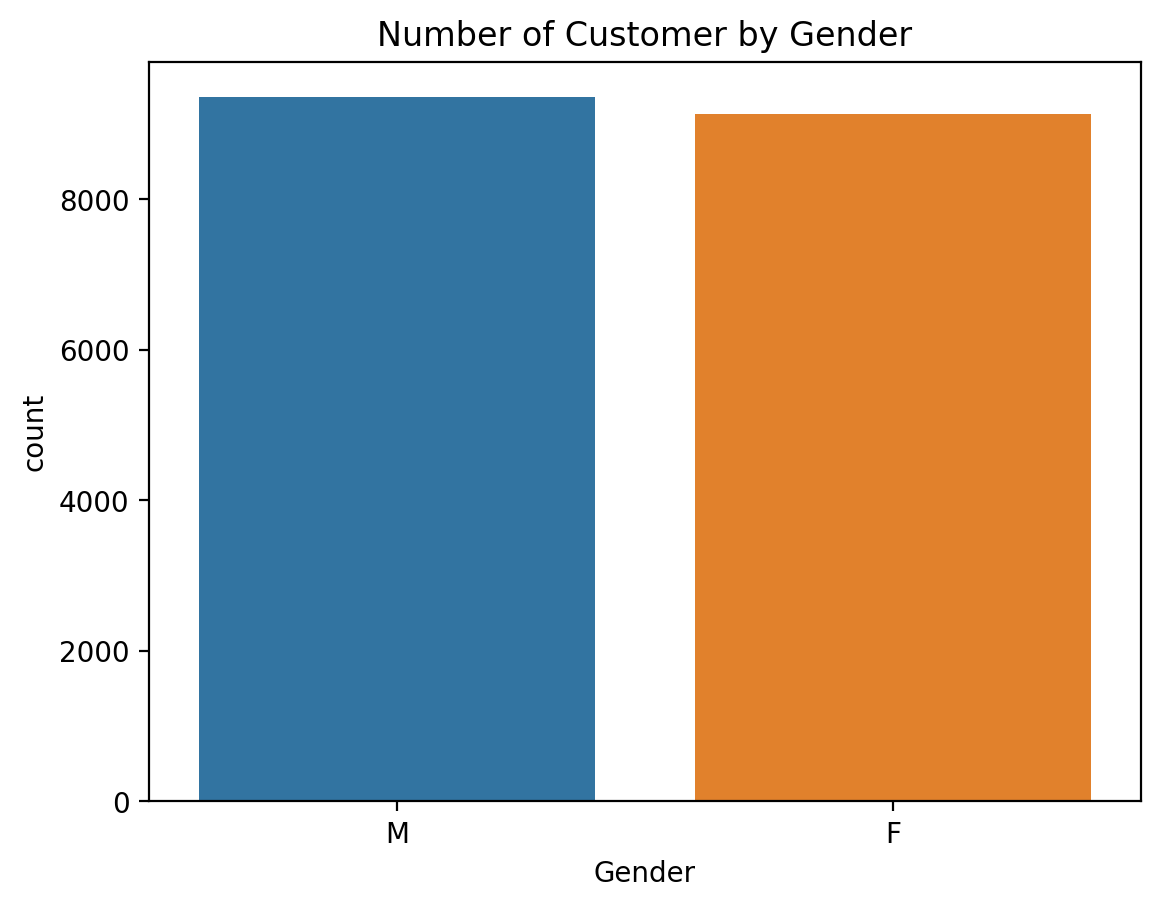

In [32]:
sns.countplot(x='Gender', data=df);
plt.title('Number of Customer by Gender');

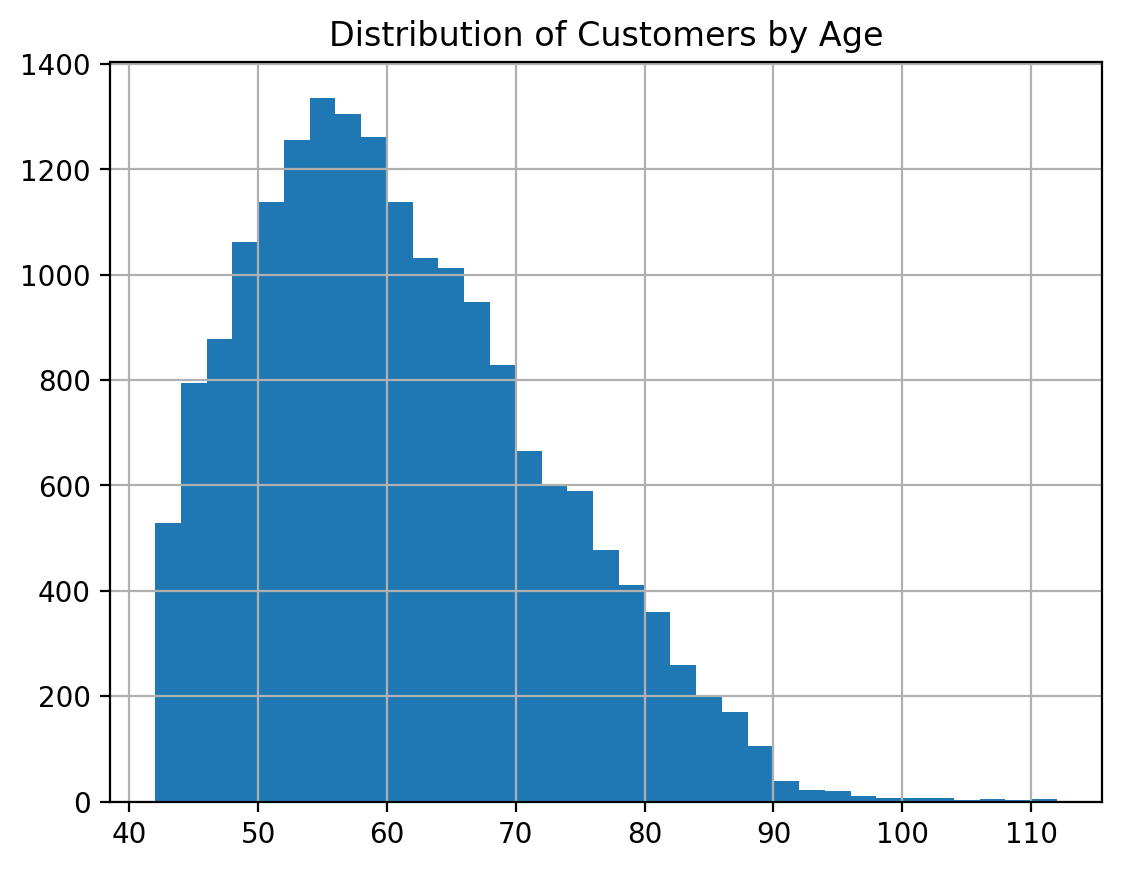

In [36]:
# Create a histogram of ages
df.hist('Age', bins=35);
plt.title('Distribution of Customers by Age');

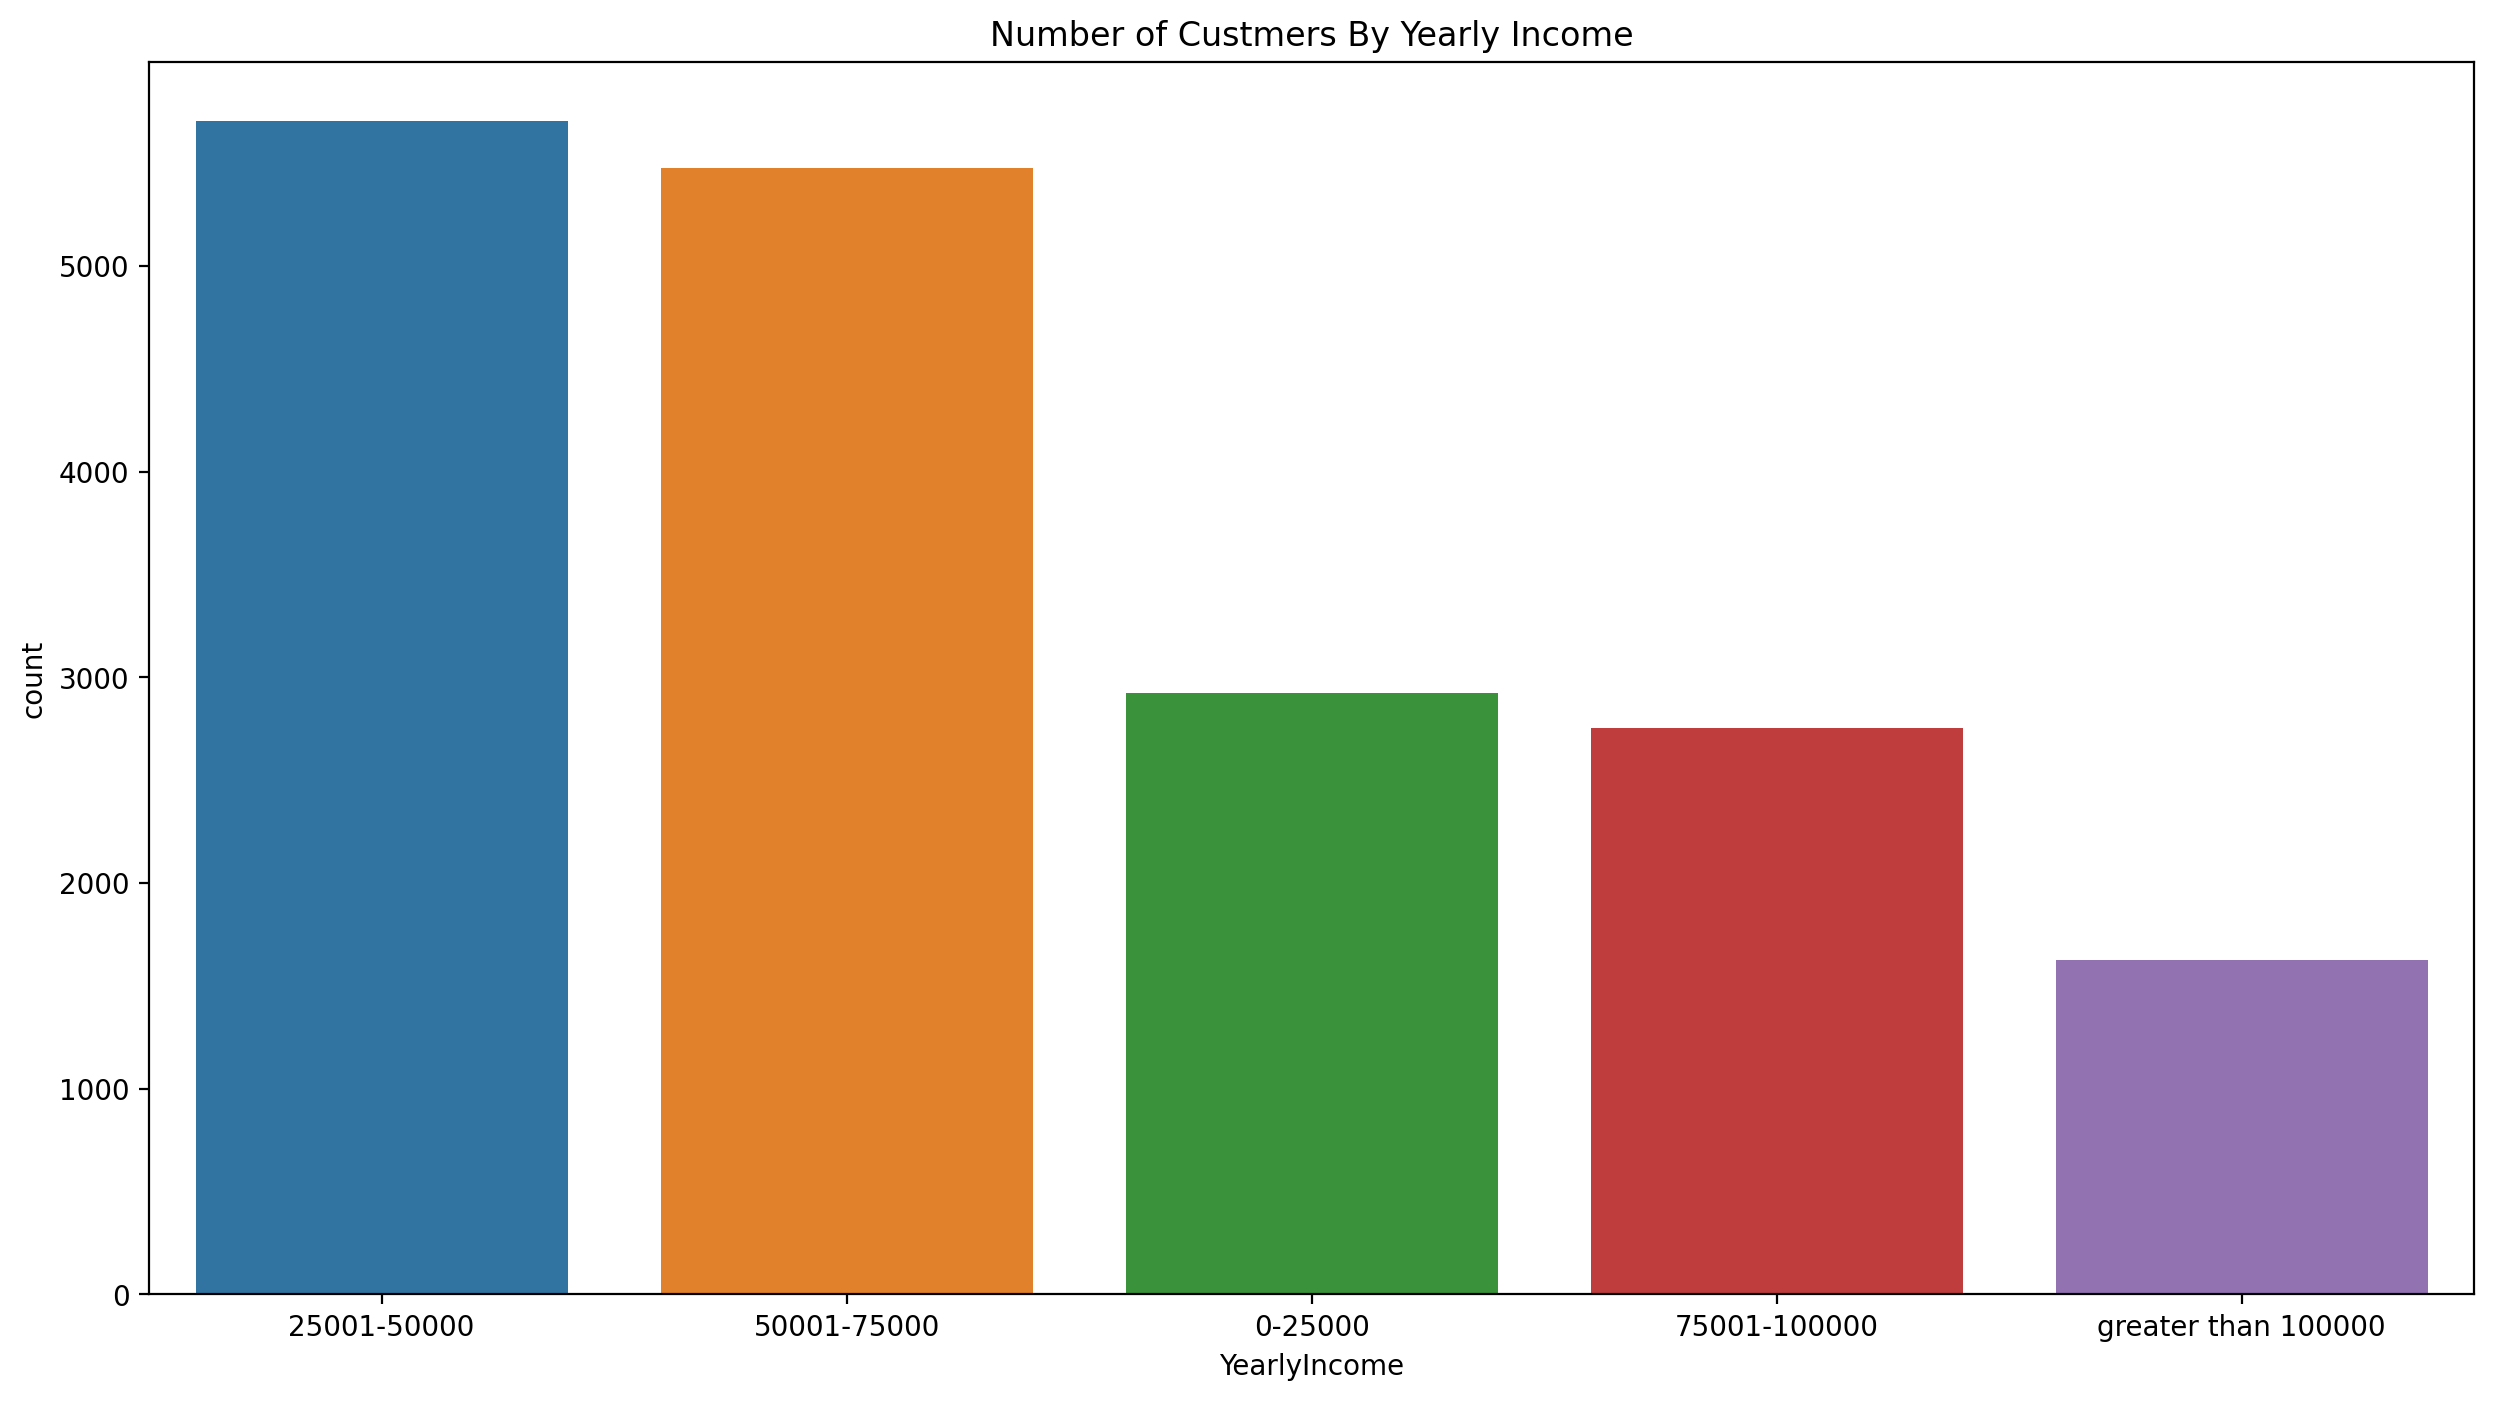

In [74]:
#df['YearlyIncome'].value_counts().plot(kind="bar")
#plt.title('Number of Custmers By Yearly Income');
#plt.show()
#results.hist('YearlyIncome');
plt.figure(figsize=(15,8))
sns.countplot(x='YearlyIncome', data=df,order = df['YearlyIncome'].value_counts().index);
plt.title('Number of Custmers By Yearly Income');


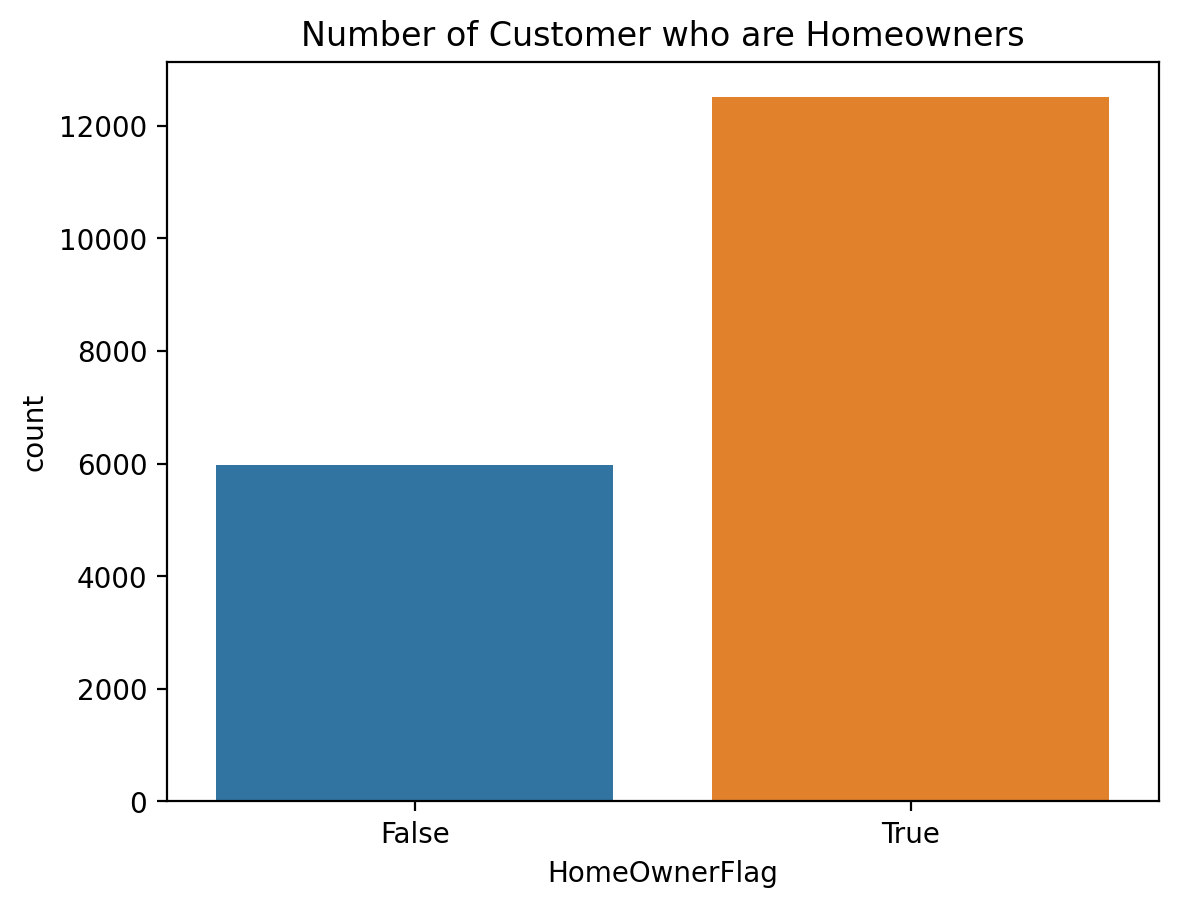

In [60]:
sns.countplot(x='HomeOwnerFlag', data=df);
plt.title('Number of Customer who are Homeowners');

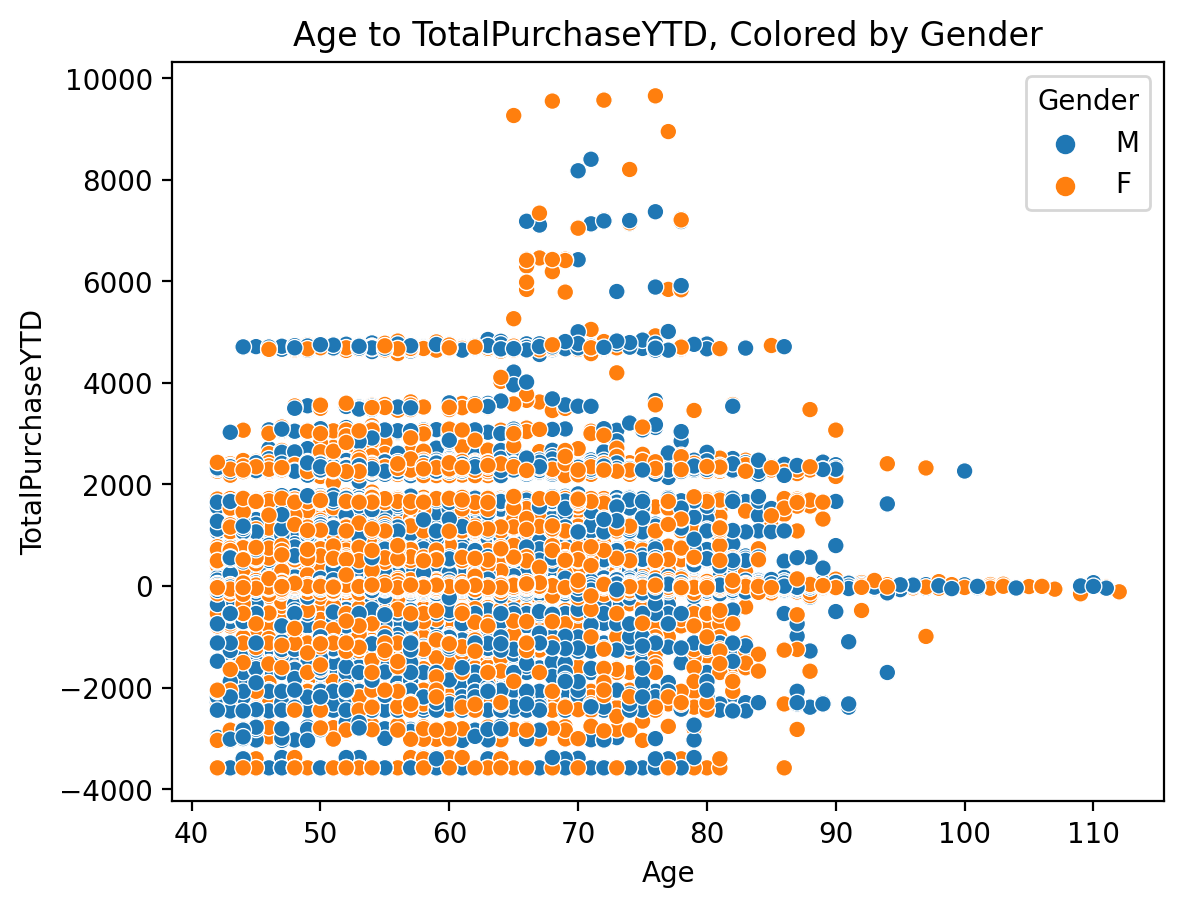

In [75]:
sns.scatterplot(data=df, x="Age", y="TotalPurchaseYTD", hue="Gender")
plt.title('Age to TotalPurchaseYTD, Colored by Gender');

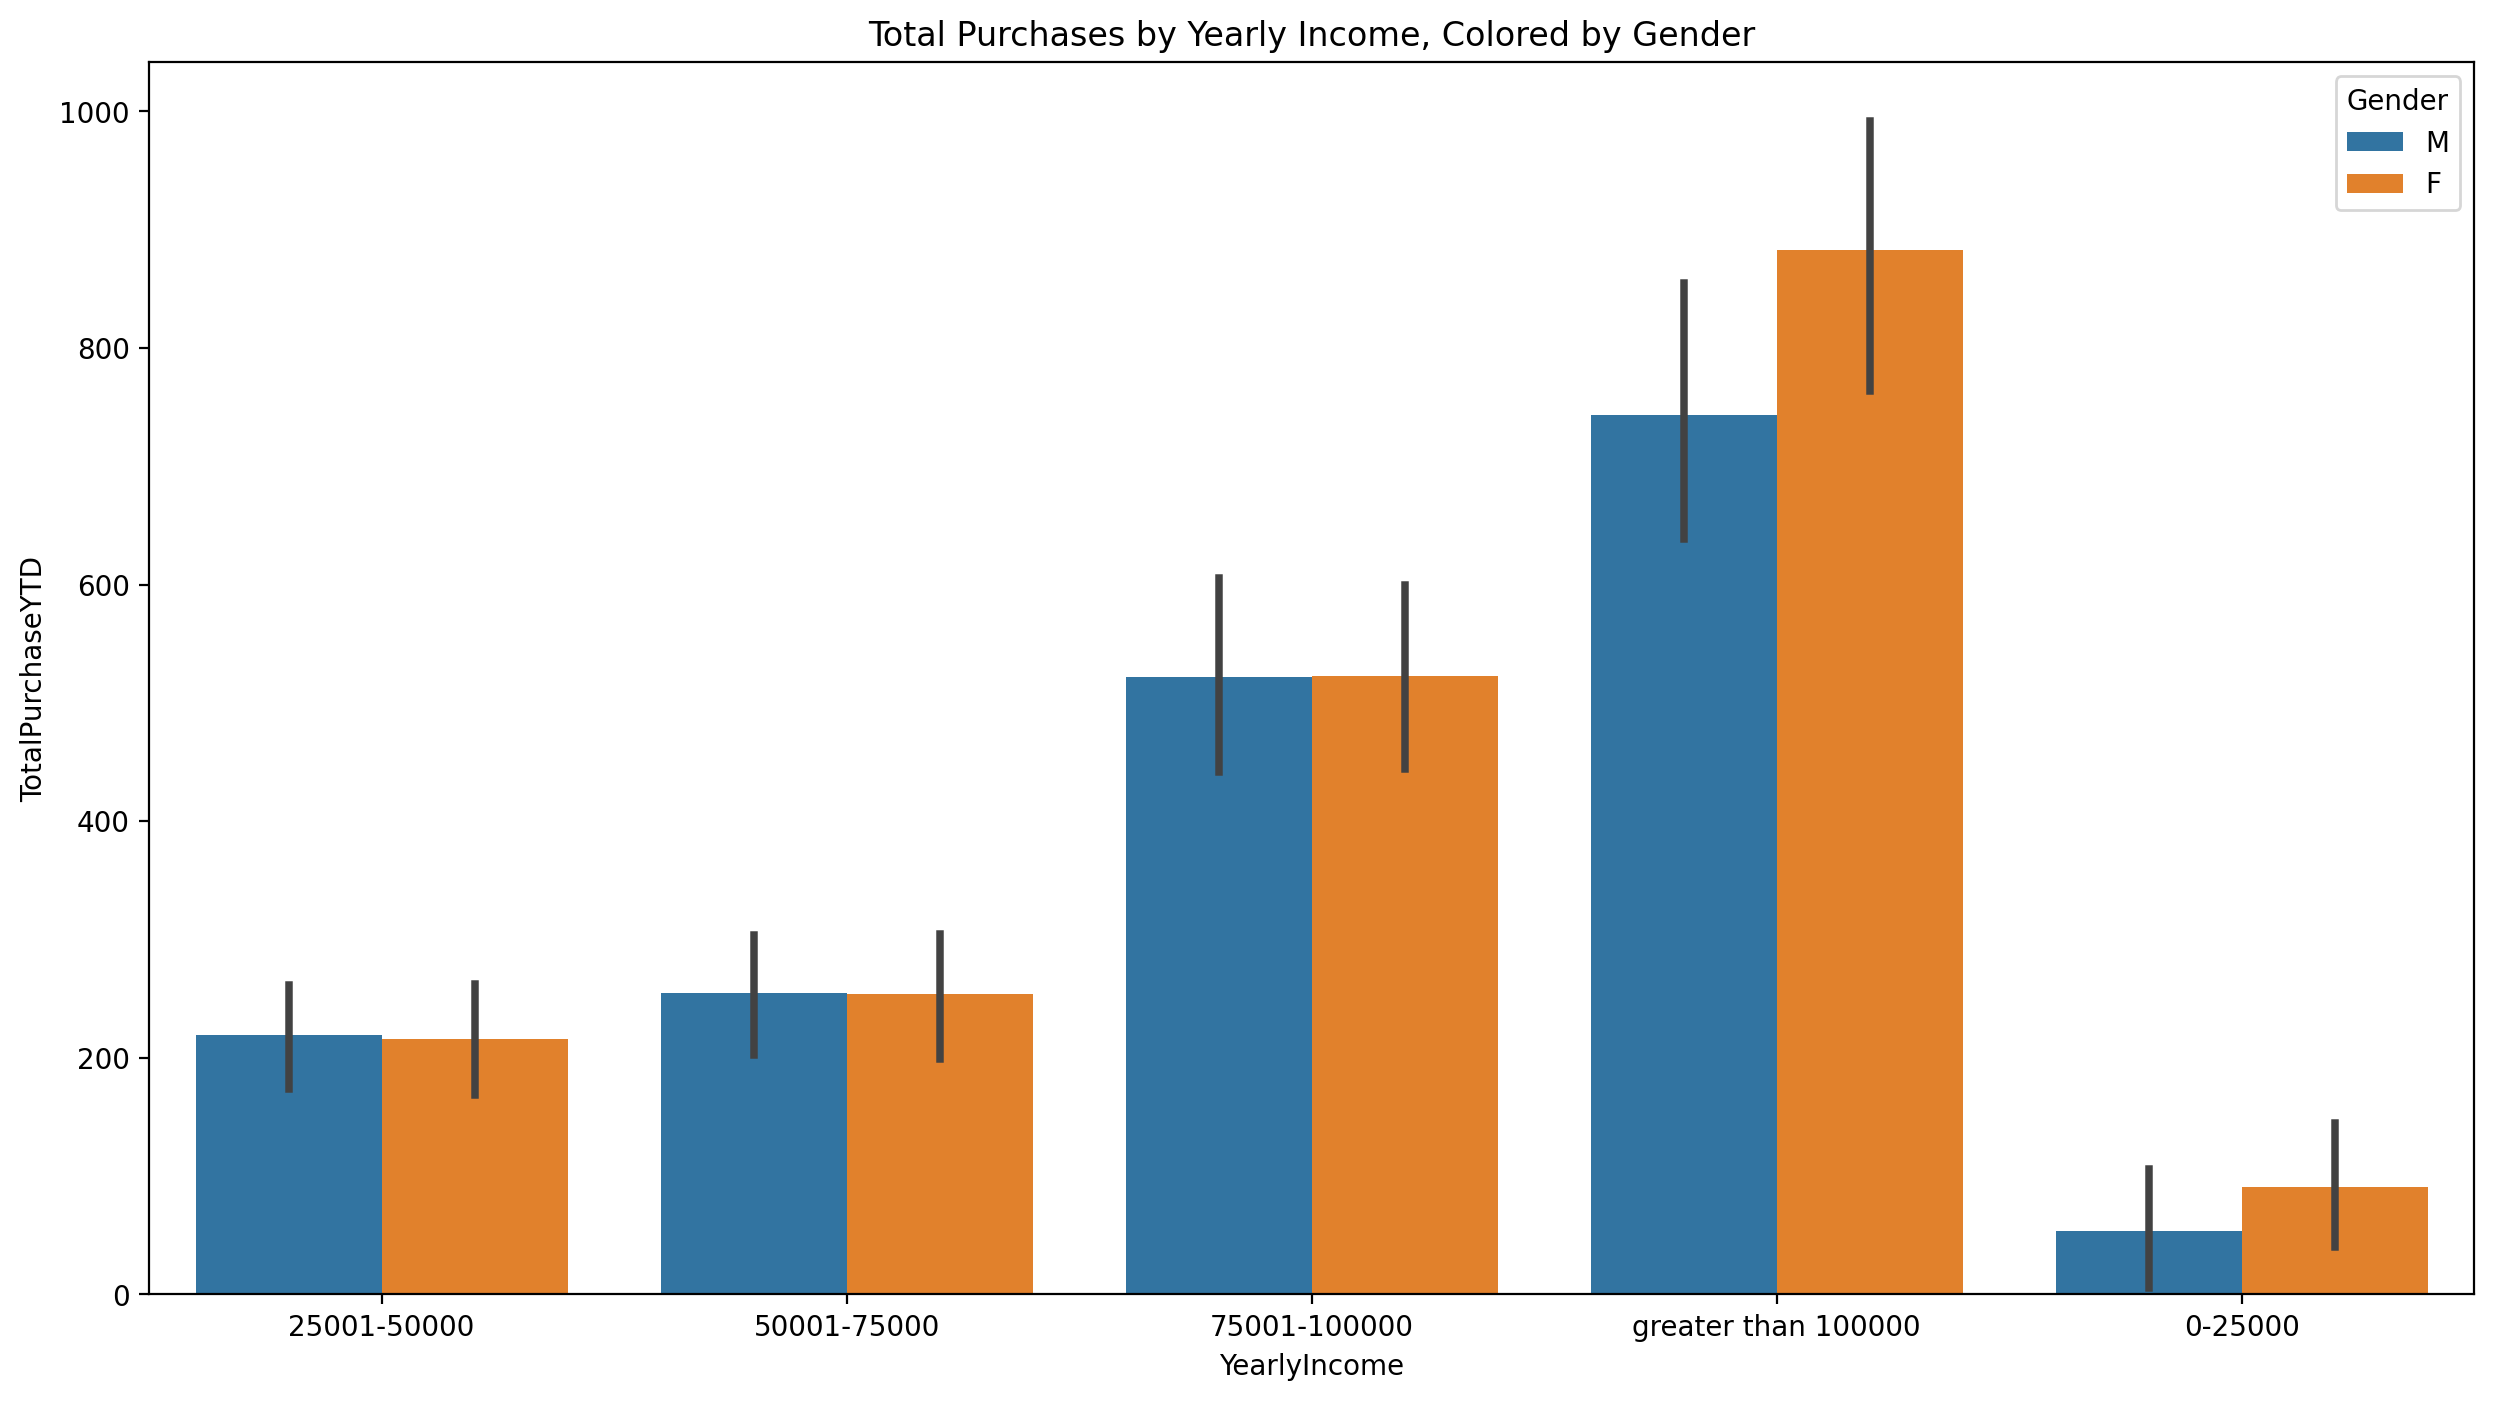

In [76]:
plt.figure(figsize=(15,8))
sns.barplot(data=df, x="YearlyIncome", y="TotalPurchaseYTD", hue="Gender")
plt.title('Total Purchases by Yearly Income, Colored by Gender');

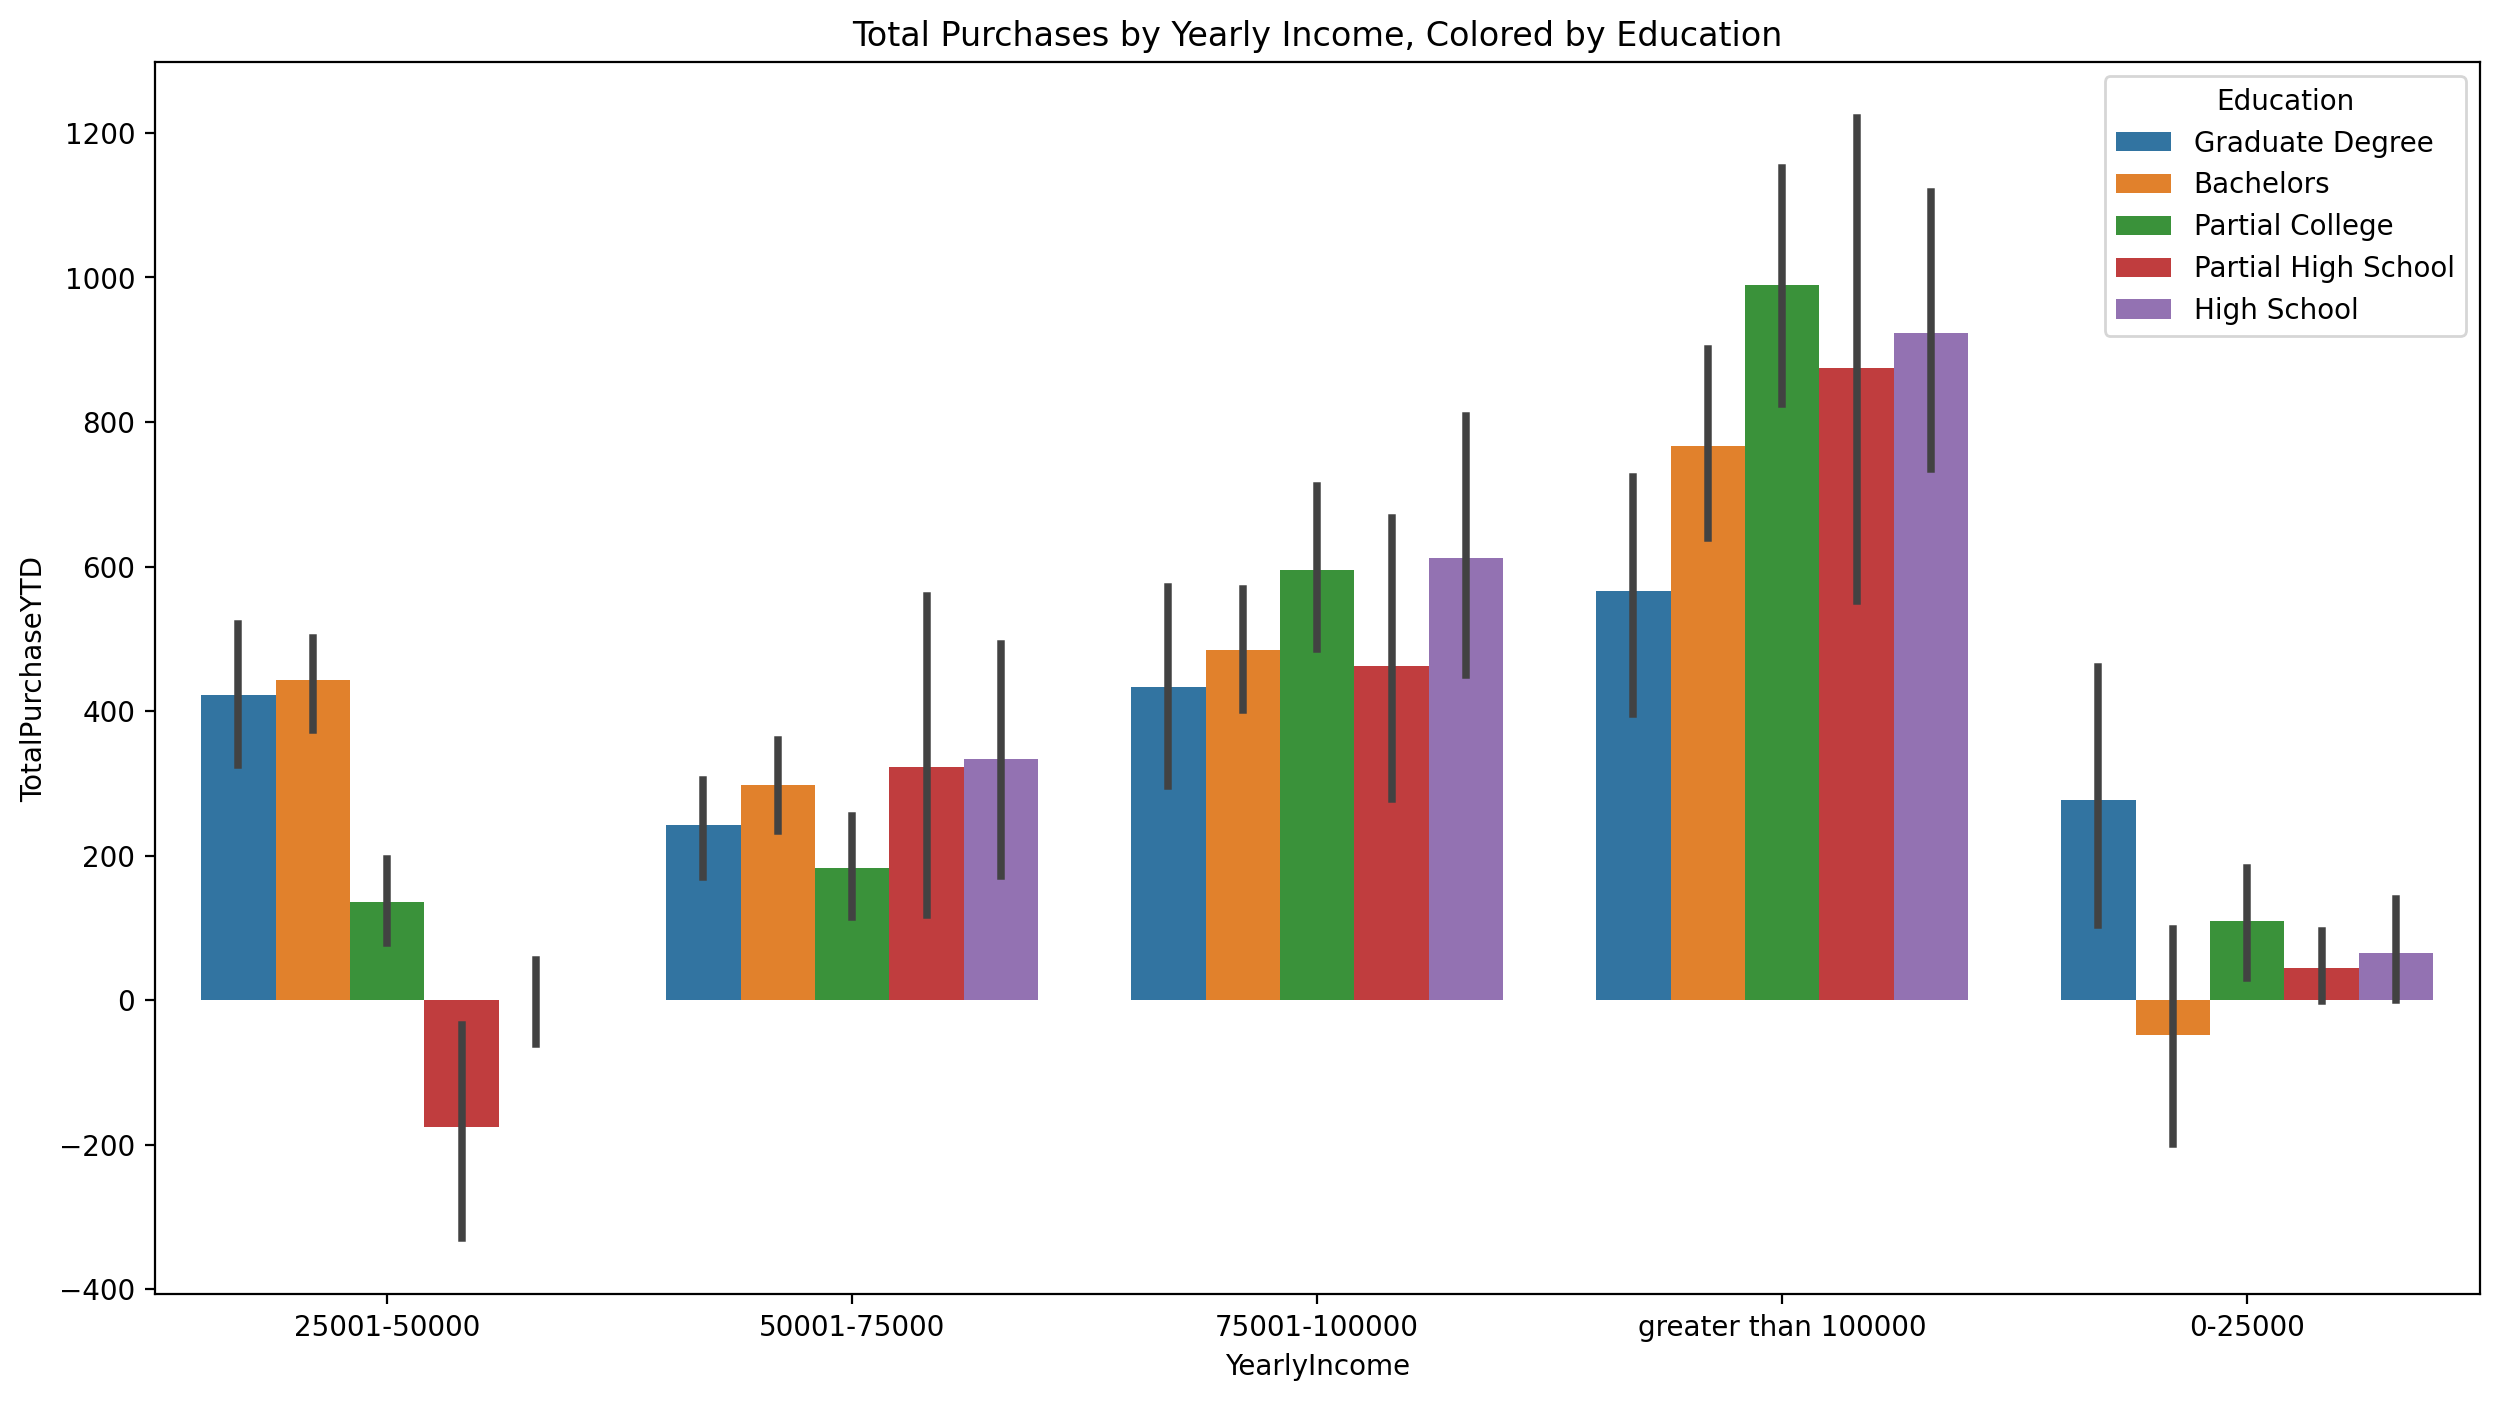

In [51]:
plt.figure(figsize=(15,8))
sns.barplot(data=df, x="YearlyIncome", y="TotalPurchaseYTD", hue="Education")
plt.title('Total Purchases by Yearly Income, Colored by Education');

Text(0.5, 1.0, 'Total Purchases by Occupation, Colored by Education')

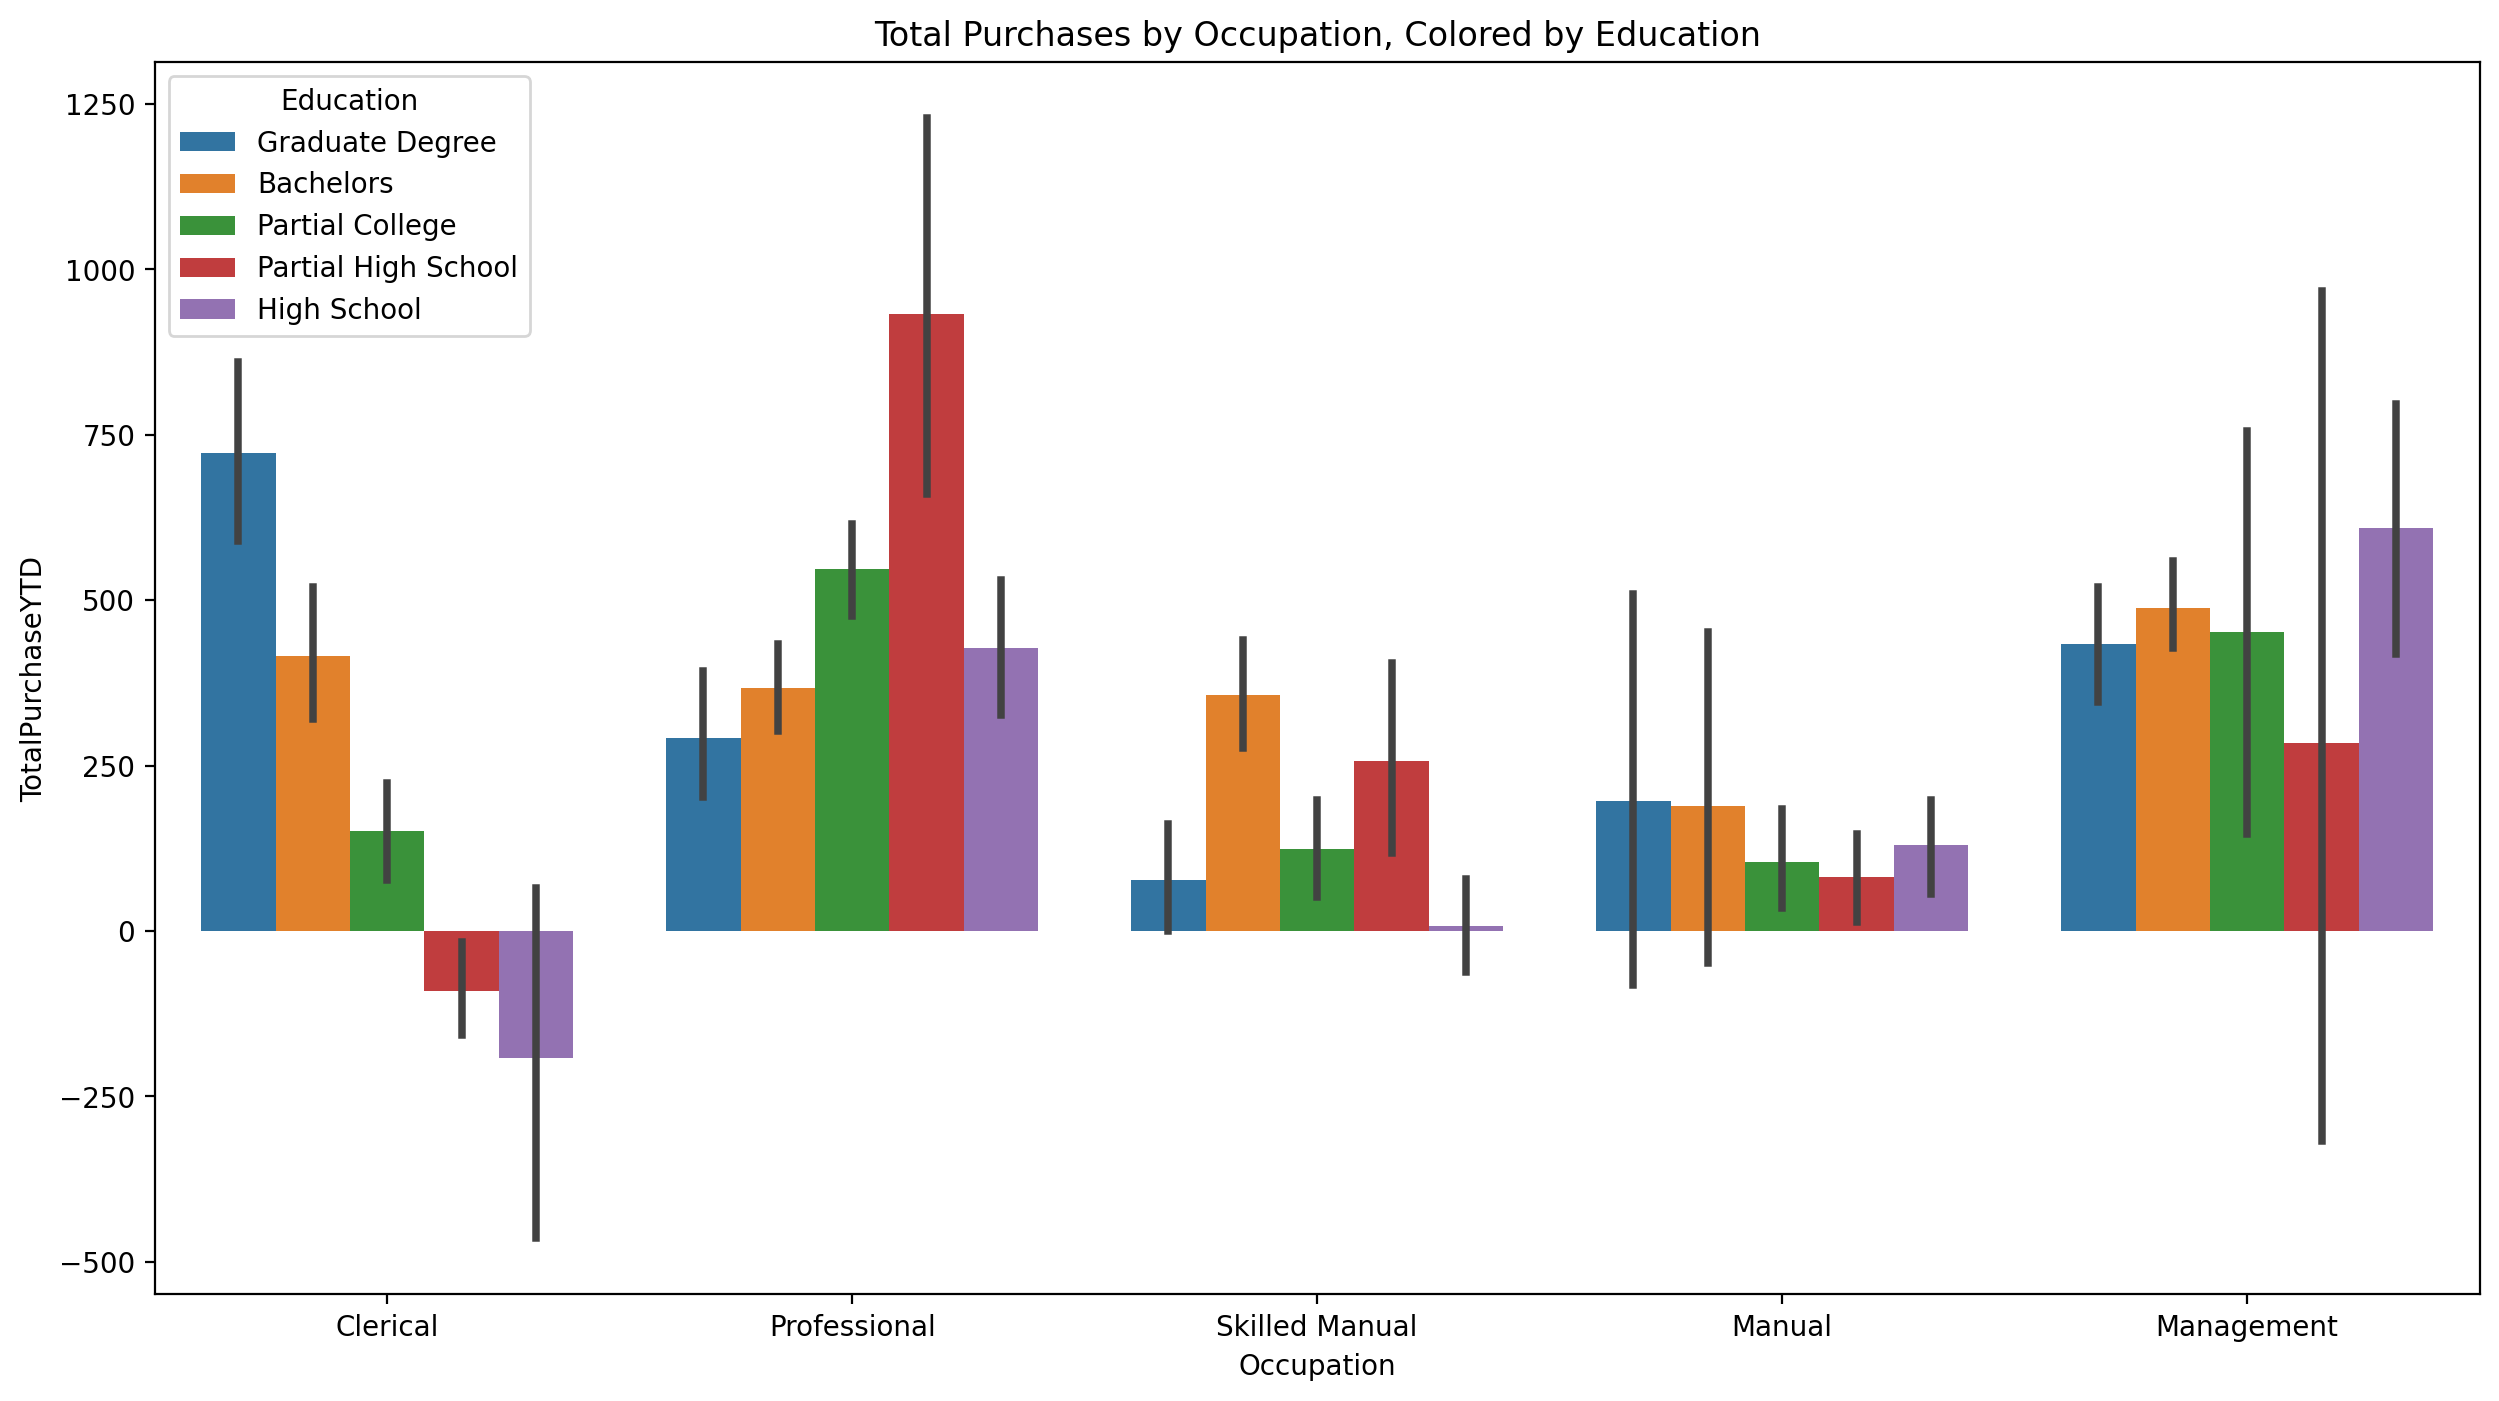

In [52]:
df = df.rename(columns={'Ocupation': 'Occupation'})
plt.figure(figsize=(15,8))
sns.barplot(data=df, x="Occupation", y="TotalPurchaseYTD", hue="Education")
plt.title('Total Purchases by Occupation, Colored by Education')

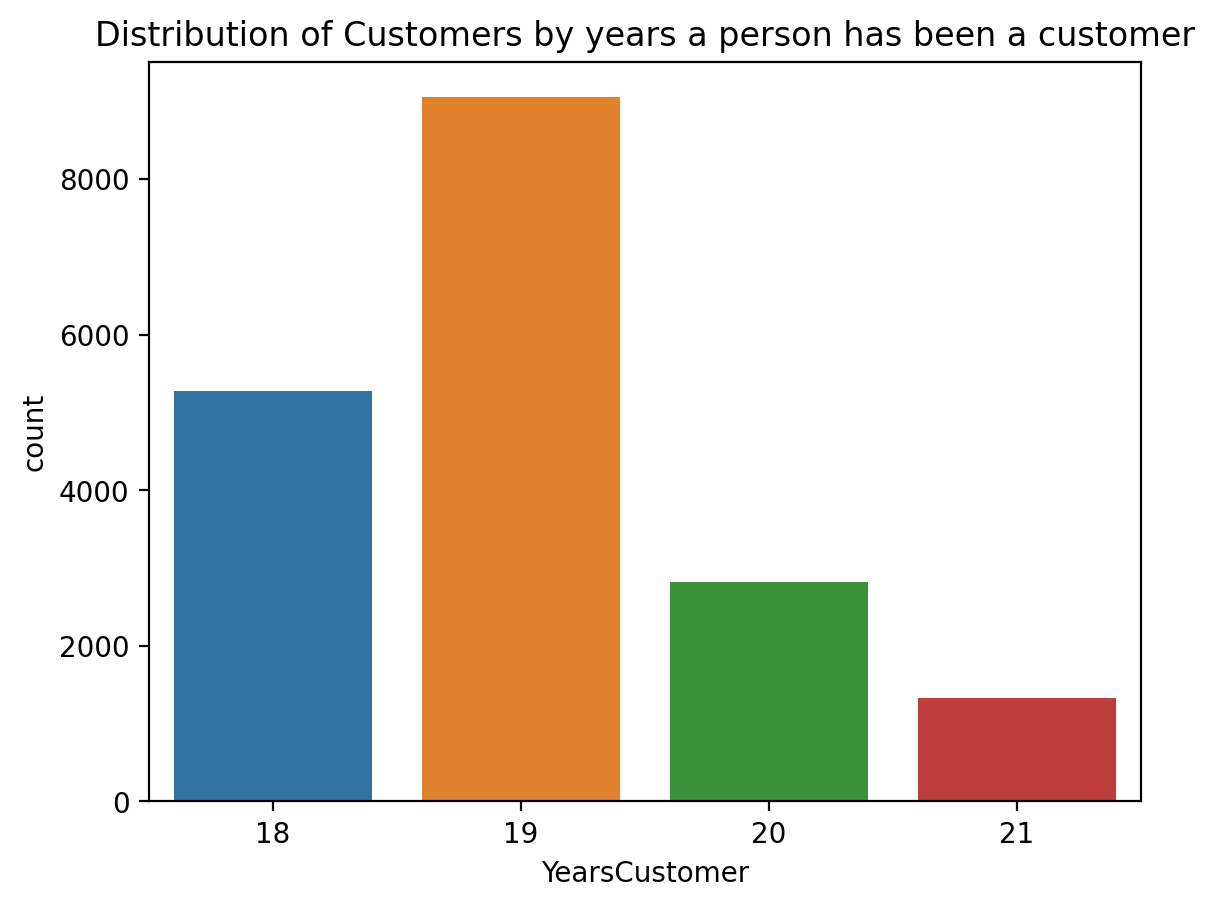

In [78]:

sns.countplot(x='YearsCustomer', data=df, label='Years as a Customer');
plt.title('Distribution of Customers by years a person has been a customer');

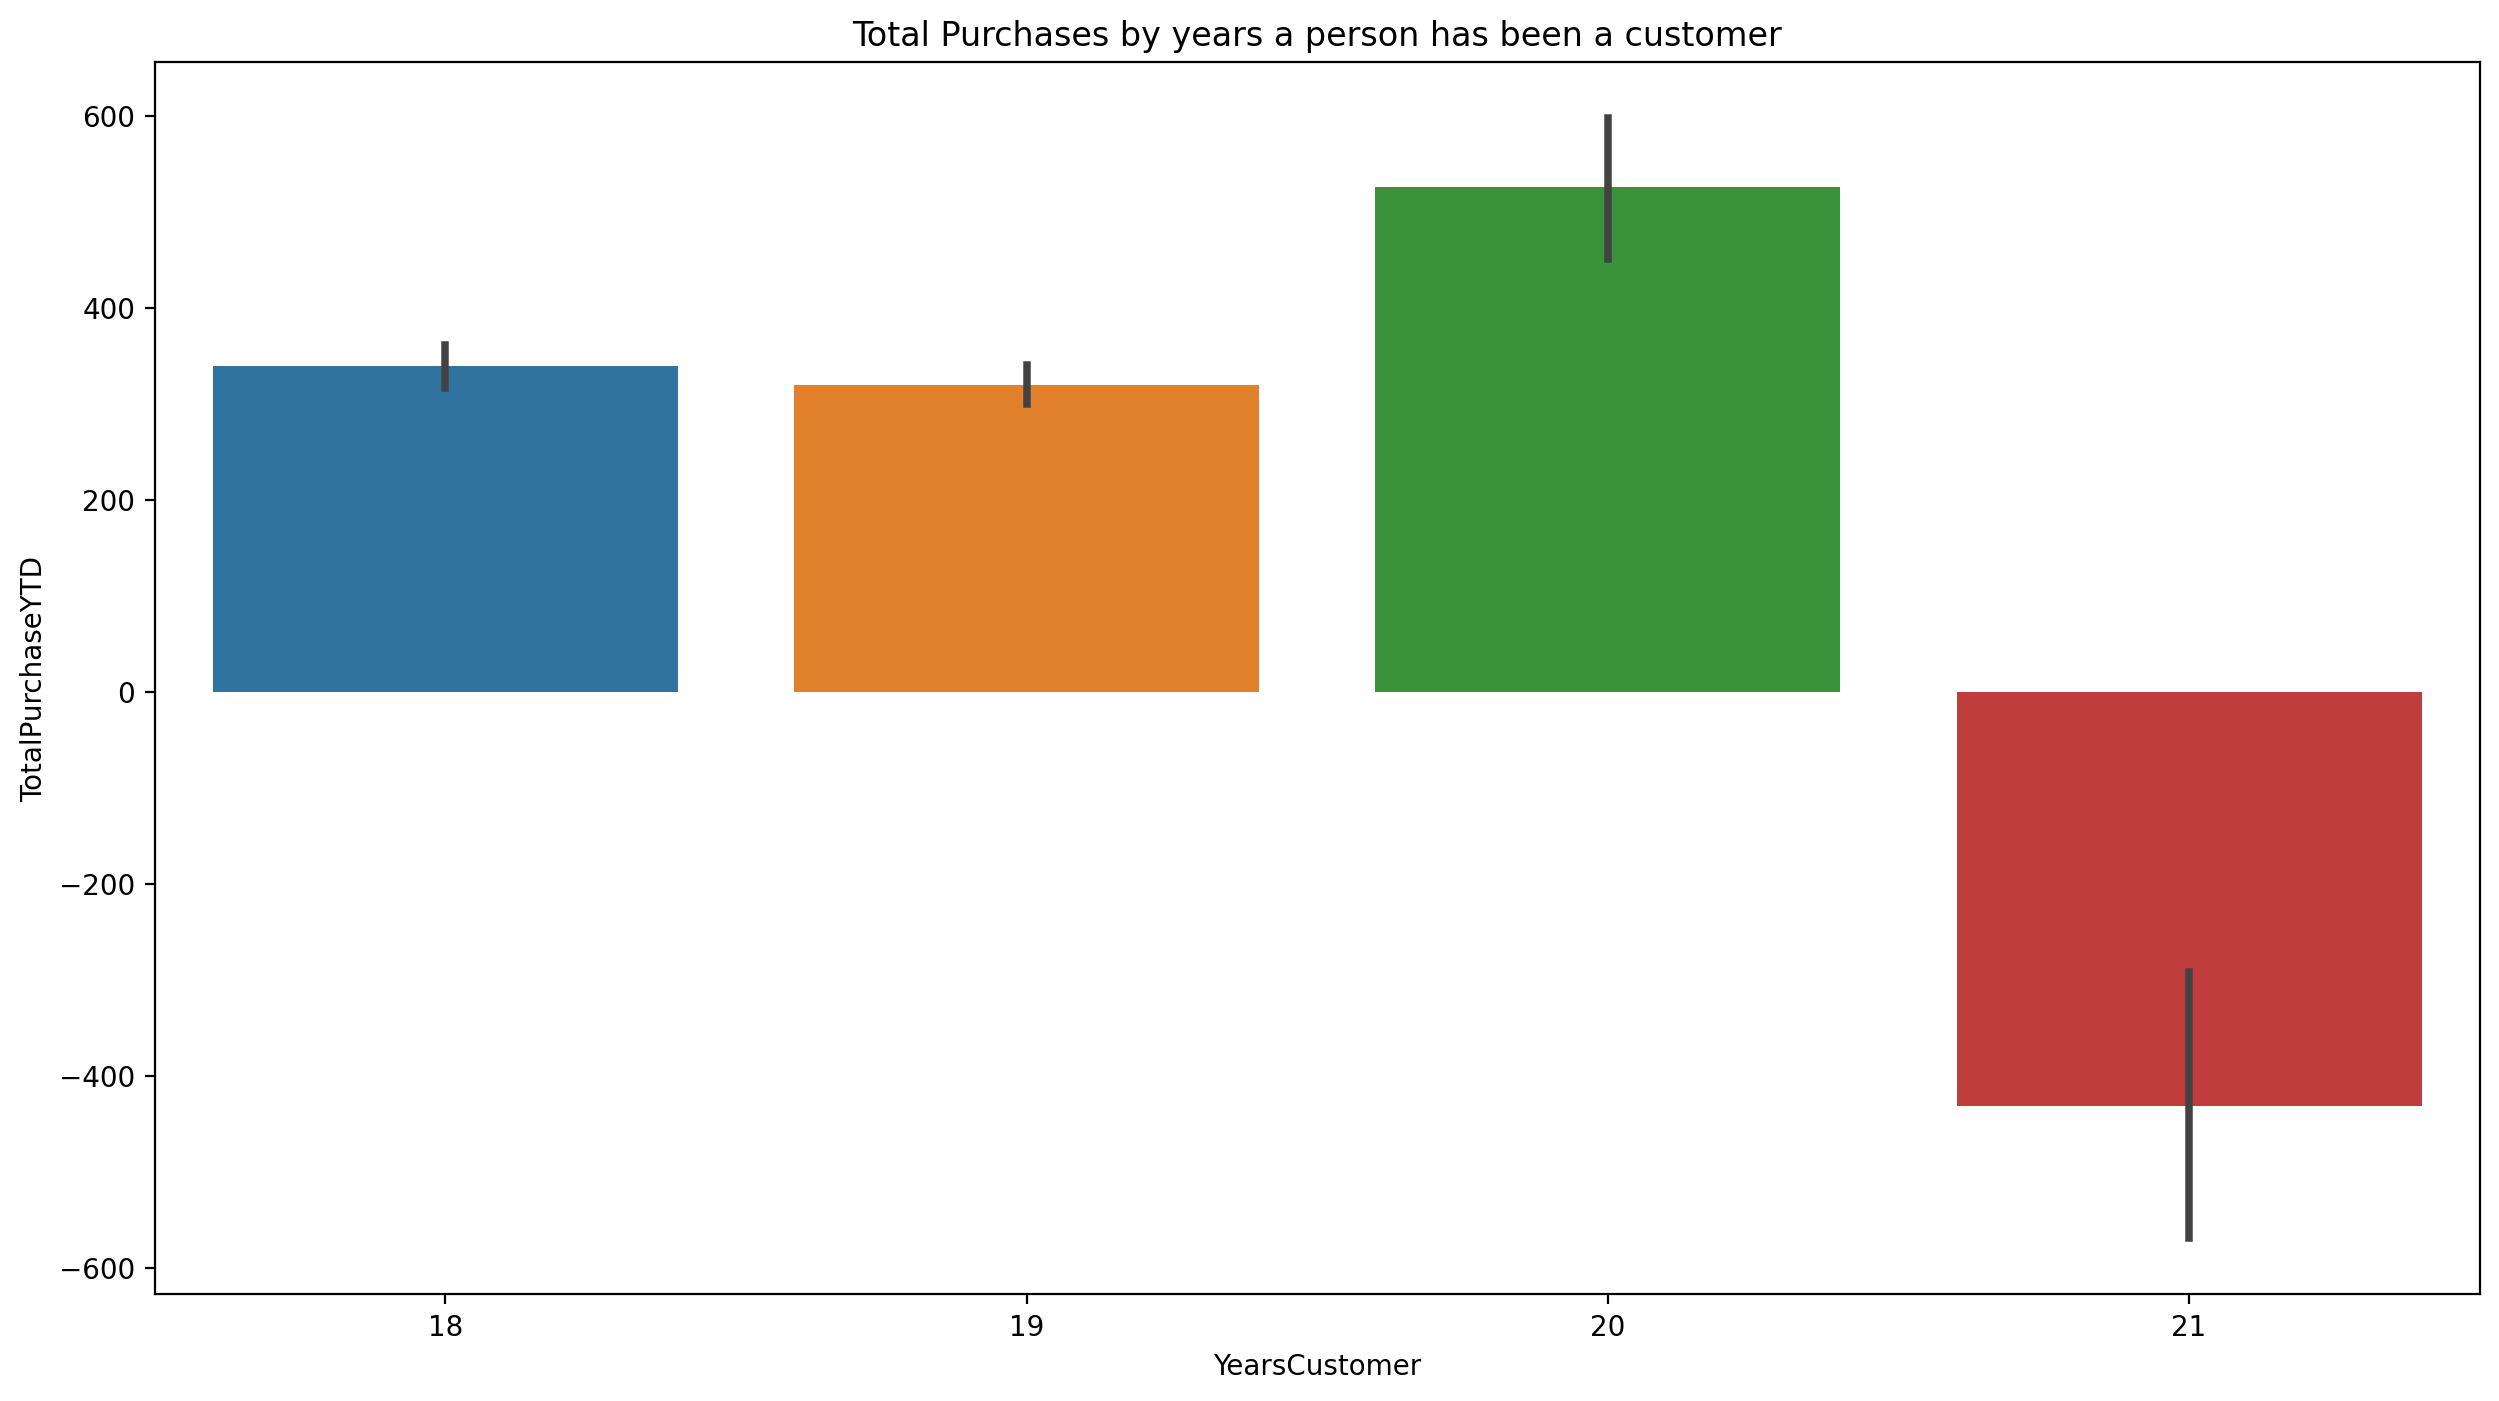

In [39]:
plt.figure(figsize=(15,8))
sns.barplot(data=df, x="YearsCustomer", y="TotalPurchaseYTD")
plt.title('Total Purchases by years a person has been a customer');

In [79]:
df.to_csv('FinalData.csv')
sel_cols=df.drop(columns=['Title', 'FirstName','MiddleName','LastName','Suffix','DateFirstPurchase','BirthDate','TotalChildren','NumberChildrenAtHome','BusinessEntityID'])
sel_cols.to_csv('FinalData_Customers.csv')